#### **Integração Numérica - Método dos trapézios**

In [1]:
import numpy as np 
import pandas as pd
import sympy as sp 
import matplotlib.pyplot as plt

Entrada

In [2]:
x = sp.Symbol('x')

In [3]:
a, b = 0, np.pi
n_trapezios = 27
n_casas_decimais = 6
expr = sp.sin(x)

Dominio, Imagem e a Integral simbólica

In [4]:
f = sp.lambdify(x, expr)
dom = np.linspace(a, b, n_trapezios+1)
img = f(dom)

print('Resolvendo a Integral: ')
sp.Integral(expr, (x, a, sp.pi))

Resolvendo a Integral: 


Integral(sin(x), (x, 0, pi))

Soma das áreas dos trapézios

In [5]:
h = (b - a) / (n_trapezios)
soma = img[0]/2 + np.sum(img[1:-1]) + img[-1]/2
area = soma * h

print(f'Área aproximada: {area:.{n_casas_decimais}f}')

Área aproximada: 1.997743


Tabela

In [6]:
#pd.options.display.max_rows = 20
#pd.set_option('display.float_format', '{:.7f}'.format)

tabela = pd.DataFrame({'x': dom, 'f(x)': img})
tabela['f(x)'] = tabela['f(x)'].map(lambda x: round(x , n_casas_decimais))

tabela


,x,f(x)
0,0.000000,0.000000
1,0.116355,0.116093
2,0.232711,0.230616
3,0.349066,0.342020
4,0.465421,0.448799
5,0.581776,0.549509
6,0.698132,0.642788
7,0.814487,0.727374
8,0.930842,0.802123
9,1.047198,0.866025


Apresentação do erro

In [7]:
def apresenta(erro,limite, n_casas_decimais):
    form = '.2e' if erro < limite else f'.{n_casas_decimais}f'
    return form

limite = 1e-4

Erro de arredondamento

In [8]:
decimal = 5 / (10 ** (n_casas_decimais + 1))
erro_arr = n_trapezios * decimal * h

form = apresenta(erro_arr, limite, n_casas_decimais)
intervalo1 =  f'({area:.{n_casas_decimais}f} ± {erro_arr:{form}})'
intervalo2 =  f'[{area - erro_arr:.{n_casas_decimais}f} ; {area+erro_arr:.{n_casas_decimais}f}]'

print(intervalo1, intervalo2, sep='\n\n')

(1.997743 ± 1.57e-06)

[1.997741 ; 1.997745]


Gráfico

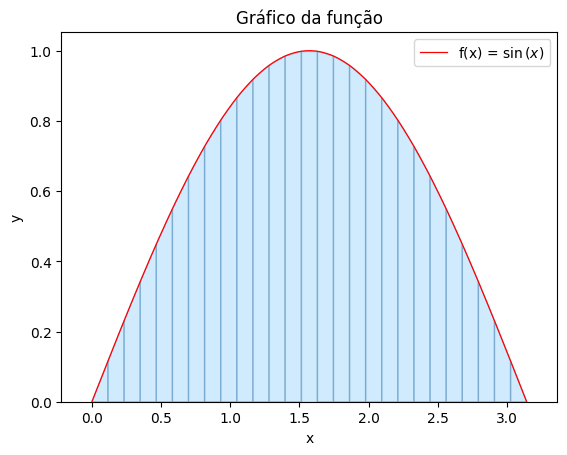

In [9]:
fig, ax = plt.subplots()
ax.set_title('Gráfico da função')

dom_plot = np.linspace(a - h/2 , b + h/2,  1000)
img_plot = f(dom_plot)
ax.plot(dom_plot, img_plot, label= f'f(x) = ${sp.latex(expr)}$', color='red', linewidth=0.9)
ax.set_ylim(bottom=0)

ax.set_xlabel('x')
ax.set_ylabel('y');

ax.legend()

for i in range(n_trapezios):
    verts = [(dom[i], 0),(dom[i], img[i]), (dom[i+1], img[i+1]), (dom[i+1],0)]
    trapezio = plt.Polygon(verts, facecolor='lightskyblue', edgecolor='steelblue', alpha=0.4)
    ax.add_patch(trapezio)



Erro de truncamento

In [10]:
out = sp.diff(sp.diff(expr))
f2 = sp.lambdify(x, out)

erro_trunc = n_trapezios * ((h**3) / (12)) * np.abs(f2(dom)).max()
form = apresenta(erro_trunc, limite, n_casas_decimais)

print(f'{erro_trunc:{form}}')


0.003538


Erro total

In [11]:
erro_total = erro_arr + erro_trunc

form = apresenta(erro_total, limite, n_casas_decimais)
intervalo1 =  f'({area:.{n_casas_decimais}f} ± {erro_total:.{n_casas_decimais}f})'
intervalo2 =  f'[{area - erro_total:.{n_casas_decimais}f} ; {area+erro_total:.{n_casas_decimais}f}]'

print(intervalo1, intervalo2, sep='\n\n')

(1.997743 ± 0.003540)

[1.994203 ; 2.001283]
